In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from itertools import combinations
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial import ConvexHull


In [2]:
# load data

df_data = pd.read_csv('candy-data.csv', index_col=0)  

df_data.drop("One dime"   ,axis=0,inplace=True)
df_data.drop("One quarter",axis=0,inplace=True)

df_data['type']='other'
df_data.loc[df_data['chocolate'] == 1,'type'] = 'chocolate'
df_data.loc[df_data['fruity'] == 1,'type'] = 'fruity'

# reorder columns
df_data = df_data [['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent', 'winpercent','type']]

df_data.info()
df_data


<class 'pandas.core.frame.DataFrame'>
Index: 83 entries, 100 Grand to Whoppers
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   chocolate         83 non-null     int64  
 1   fruity            83 non-null     int64  
 2   caramel           83 non-null     int64  
 3   peanutyalmondy    83 non-null     int64  
 4   nougat            83 non-null     int64  
 5   crispedricewafer  83 non-null     int64  
 6   hard              83 non-null     int64  
 7   bar               83 non-null     int64  
 8   pluribus          83 non-null     int64  
 9   sugarpercent      83 non-null     float64
 10  pricepercent      83 non-null     float64
 11  winpercent        83 non-null     float64
 12  type              83 non-null     object 
dtypes: float64(3), int64(9), object(1)
memory usage: 9.1+ KB


,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,type
competitorname,,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,chocolate
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,chocolate
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,fruity
Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546,chocolate
Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547,chocolate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282,fruity
Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898,fruity
Welch's Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519,fruity


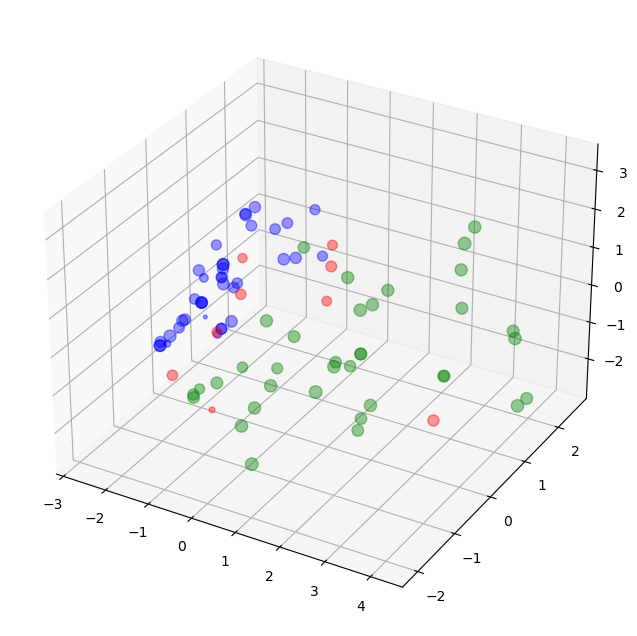

In [3]:

# NYOUG - Automated Anomalous DB Activity Detector Using Machine Learning

df_data['color']='r'
df_data.loc[df_data['chocolate'] == 1,'color'] = 'g'
df_data.loc[df_data['fruity'] == 1,'color'] = 'b'

df_data['size']= np.log ((df_data['winpercent'] - 21) ** 10 ) * 2

pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()

to_model_columns = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus','sugarpercent','pricepercent']

X = scaler.fit_transform(df_data[to_model_columns])
X_reduce = pca.fit_transform(X)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=df_data['size'], lw=1, label="candy",c=df_data['color'],alpha=0.4) 
plt.show()

df_data['x'] = X_reduce[:,0]
df_data['y'] = X_reduce[:,1]
df_data['z'] = X_reduce[:,2]


In [4]:
import math

def blackbox_count (candy_1, candy_2, candy_3, radius):
    
    def distance(row):
        d = math.sqrt(abs(row['x'] - row['candy_x'])**2 + 
                      abs(row['y'] - row['candy_y'])**2 + 
                      abs(row['z'] - row['candy_z'])**2)
        return d    
    
    df_temp = df_data[['x','y','z','winpercent']].copy()
    
    df_candy_1 = df_data.loc[candy_1]
    df_temp[['candy_x','candy_y','candy_z']] = df_candy_1 [['x','y','z']]   
    df_temp['distance_1'] = df_temp.apply(distance, axis=1)

    df_candy_2 = df_data.loc[candy_2]
    df_temp[['candy_x','candy_y','candy_z']] = df_candy_2 [['x','y','z']]   
    df_temp['distance_2'] = df_temp.apply(distance, axis=1)

    df_candy_3 = df_data.loc[candy_3]
    df_temp[['candy_x','candy_y','candy_z']] = df_candy_3 [['x','y','z']]       
    df_temp['distance_3'] = df_temp.apply(distance, axis=1)
    
    result = df_temp['winpercent'].loc[(df_temp['distance_1'] <= radius) | 
                                       (df_temp['distance_2'] <= radius) | 
                                       (df_temp['distance_3'] <= radius)].sum()
    
    return round (result,2)


In [5]:
# Test blackbox_count function

for radius in (1,1.25,1.5,1.75,
               2,2.25,2.5,2.75,
               3,3.25,3.5,3.75,
               4,4.25,4.5,4.75):
    
    result = blackbox_count ('100 Grand','3 Musketeers','Air Heads', radius)
    print (str(radius) + '\t' +  str(result))


1	467.03
1.25	879.35
1.5	1259.71
1.75	1891.4
2	2244.0
2.25	2581.91
2.5	3029.76
2.75	3514.23
3	3878.88
3.25	3973.76
3.5	4043.25
3.75	4198.55
4	4198.55
4.25	4198.55
4.5	4198.55
4.75	4198.55


In [ ]:
# Run the model for a single radius 

radius = 3.25

model = []
all_candy = df_data.index

for candies in combinations(all_candy, 3):

    df_candy_1 =df_data.loc[candies[0]]
    df_candy_2 =df_data.loc[candies[1]]
    df_candy_3 =df_data.loc[candies[2]]

    result = blackbox_count (candies[0], candies[1], candies[2], radius)

    model.append({ 'candy_1': candies[0],
                   'candy_2': candies[1],
                   'candy_3': candies[2],
                   'winpct_1': df_candy_1['winpercent'],
                   'winpct_2': df_candy_2['winpercent'],
                   'winpct_3': df_candy_3['winpercent'],
                   'winpct'  : df_candy_1['winpercent'] + df_candy_2['winpercent'] + df_candy_3['winpercent'],
                   'result' : result
                })

df_result = pd.DataFrame(model).sort_values(by=['result','winpct'], ascending=False)
df_result.head(10)


In [ ]:
# takes a long time: write datframe to excel !!!

for radius in (1,1.25,1.5,1.75,
               2,2.25,2.5,2.75,
               3,3.25,3.5,3.75,
               4,4.25,4.5,4.75):

    model = []
    all_candy = df_data.index
    comb = combinations(all_candy, 3)

    print (radius)
    for candies in comb:

        df_candy_1=df_data.loc[candies[0]]
        df_candy_2=df_data.loc[candies[1]]
        df_candy_3=df_data.loc[candies[2]]
        
        result = blackbox_count (candies[0], candies[1], candies[2], radius)

        model.append({ 'candy_1' : candies[0],
                       'candy_2' : candies[1],
                       'candy_3' : candies[2],
                       'winpct_1': df_candy_1['winpercent'],
                       'winpct_2': df_candy_2['winpercent'],
                       'winpct_3': df_candy_3['winpercent'],
                       'winpct'  : df_candy_1['winpercent'] + df_candy_2['winpercent'] + df_candy_3['winpercent'],
                       'result'  : result
                    })

    df_result = pd.DataFrame(model).sort_values(by=['result','winpct'], ascending=False)
    df_result.to_excel('box_candy_'+str(radius)+'.xlsx')
    
#
# Results are stored in excel files.
# It takes a while to calculate
#

In [6]:

#
# Reload excel files. No need to rerun the model.
#

result={}
for radius in (1,1.25,1.5,1.75,
               2,2.25,2.5,2.75,
               3,3.25,3.5,3.75,
               4,4.25,4.5,4.75):
    result[radius] = pd.read_excel('box_candy_'+str(radius)+'.xlsx', index_col=0)
    print (radius)


1
1.25
1.5
1.75
2
2.25
2.5
2.75
3
3.25
3.5
3.75
4
4.25
4.5
4.75


In [7]:
# test for loop

for r, temp  in result.items():
   row = temp.sort_values(by=['result','winpct'], ascending=False).head(1)  
   c1 = temp['candy_1'].head(1).values[0]
   c2 = temp['candy_2'].head(1).values[0]
   c3 = temp['candy_3'].head(1).values[0]
             
   print(str(r)+'\t'+c1+'\t'+c2+'\t'+c3)

1	Mounds	Now & Later	Root Beer Barrels
1.25	Haribo Gold Bears	Reese's Peanut Butter cup	Root Beer Barrels
1.5	Milk Duds	Pixie Sticks	Root Beer Barrels
1.75	Jawbusters	Snickers	Tootsie Roll Juniors
2	Peanut butter M&M's	Skittles original	Snickers Crisper
2.25	Dots	Peanut butter M&M's	Twix
2.5	3 Musketeers	Kit Kat	Swedish Fish
2.75	Candy Corn	Kit Kat	Snickers
3	Haribo Happy Cola	Kit Kat	Snickers
3.25	Kit Kat	Lifesavers big ring gummies	Snickers
3.5	Kit Kat	Snickers	Starburst
3.75	Snickers	Starburst	Twix
4	Snickers	Starburst	Twix
4.25	Reese's Peanut Butter cup	Starburst	Twix
4.5	Reese's Miniatures	Reese's Peanut Butter cup	Starburst
4.75	Reese's Miniatures	Reese's Peanut Butter cup	Twix


In [8]:

# make a graph

radius=3.25

df_topn=pd.read_excel('box_candy_'+str(radius)+'.xlsx', index_col=0)
df_temp = df_data.copy()

df_topn = df_topn.sort_values(by=['result','winpct'], ascending=False).head(1)  
candy_1 = df_topn['candy_1'].head(1).values[0]
candy_2 = df_topn['candy_2'].head(1).values[0]
candy_3 = df_topn['candy_3'].head(1).values[0]
    
print (candy_1,candy_2,candy_3)    

Kit Kat Lifesavers big ring gummies Snickers


In [9]:

# calculate distances

def distance(row):
    d = math.sqrt(abs(row['x'] - row['candy_x'])**2 + 
                  abs(row['y'] - row['candy_y'])**2 + 
                  abs(row['z'] - row['candy_z'])**2)
    return d    


df_candy_1 = df_data.loc[candy_1]
df_temp[['candy_x','candy_y','candy_z']] = df_candy_1 [['x','y','z']]   
df_temp['distance_1'] = df_temp.apply(distance, axis=1)

df_candy_2 = df_data.loc[candy_2]
df_temp[['candy_x','candy_y','candy_z']] = df_candy_2 [['x','y','z']]   
df_temp['distance_2'] = df_temp.apply(distance, axis=1)

df_candy_3 = df_data.loc[candy_3]
df_temp[['candy_x','candy_y','candy_z']] = df_candy_3 [['x','y','z']]   
df_temp['distance_3'] = df_temp.apply(distance, axis=1)

df_temp = df_temp.drop(['candy_x', 'candy_y', 'candy_z'], axis=1)

df_temp

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,...,winpercent,type,color,size,x,y,z,distance_1,distance_2,distance_3
competitorname,,,,,,,,,,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,...,66.971725,chocolate,g,76.560531,3.634322,0.739247,2.919970,2.316422,6.100071,5.395990
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,...,67.602936,chocolate,g,76.833271,2.579985,1.315108,-1.812482,4.099527,4.265393,1.592967
Air Heads,0,1,0,0,0,0,0,0,0,0.906,...,52.341465,fruity,b,68.898840,-0.804576,0.903644,0.551037,3.800544,1.489385,5.706221
Almond Joy,1,0,0,1,0,0,0,1,0,0.465,...,50.347546,chocolate,g,67.584179,2.584831,-0.980490,-0.858339,2.571429,4.053210,3.347569
Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,...,56.914547,chocolate,g,71.622848,4.193525,1.676739,-2.182298,4.938525,5.952578,0.267082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Twizzlers,0,1,0,0,0,0,0,0,0,0.220,...,45.466282,fruity,b,63.945918,-1.528248,0.054546,-0.826688,4.743954,0.323745,5.985298
Warheads,0,1,0,0,0,0,1,0,0,0.093,...,39.011898,fruity,b,57.820651,-2.142021,1.147247,-0.729819,5.501311,1.352231,6.411771
Welch's Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,...,44.375519,fruity,b,63.033786,-1.843568,-0.524167,-0.183841,4.647646,0.901296,6.633218


2.397030007815241 -0.7920470796699682 1.6992903045273084
-1.3157618603007835 0.08671647460501082 -0.5845617570090564
4.033349541849643 1.6207510829554659 -2.3885541327101785


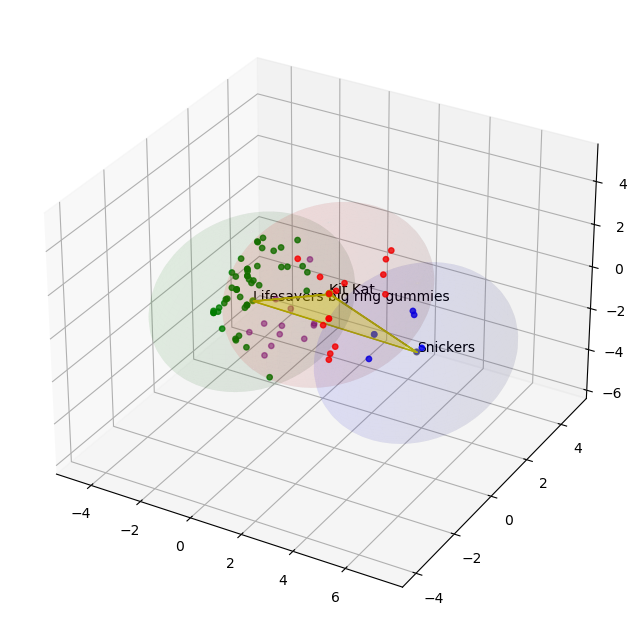

In [10]:

# Make the graph

df_sphere1 = df_temp.loc[(df_temp['distance_1'] <= radius) & (df_temp['distance_2'] > radius) & (df_temp['distance_3'] > radius) ]
df_sphere2 = df_temp.loc[(df_temp['distance_2'] <= radius) & (df_temp['distance_1'] > radius) & (df_temp['distance_3'] > radius) ]
df_sphere3 = df_temp.loc[(df_temp['distance_3'] <= radius) & (df_temp['distance_1'] > radius) & (df_temp['distance_2'] > radius) ]

df_combined = df_temp.loc[((df_temp['distance_1'] < radius) & (df_temp['distance_2'] < radius) & (df_temp['distance_3'] < radius))
                         |((df_temp['distance_1'] < radius) & (df_temp['distance_2'] < radius))
                         |((df_temp['distance_1'] < radius) & (df_temp['distance_3'] < radius))
                         |((df_temp['distance_2'] < radius) & (df_temp['distance_3'] < radius))]

df_other   = df_temp.loc[(df_temp['distance_1'] > radius) & (df_temp['distance_2'] > radius) & (df_temp['distance_3'] > radius)]


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
# other candy
ax.scatter(df_other['x'], df_other['y'], zs=df_other['z'], s=5, lw=1, label="candy",c='black',alpha=0.3) 
ax.scatter(df_combined['x'], df_combined['y'], zs=df_combined['z'], s=15, lw=1, label="candy",c='purple',alpha=0.5) 

ax.scatter(df_sphere1['x'], df_sphere1['y'], zs=df_sphere1['z'], s=15, lw=1, label="candy",c='red',alpha=0.8) 
ax.scatter(df_sphere2['x'], df_sphere2['y'], zs=df_sphere2['z'], s=15, lw=1, label="candy",c='green',alpha=0.8) 
ax.scatter(df_sphere3['x'], df_sphere3['y'], zs=df_sphere3['z'], s=15, lw=1, label="candy",c='blue',alpha=0.8) 

df_triangle1=df_data.loc[[candy_1,candy_2,candy_3]][['type','x','y','z','winpercent','chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']]

vertices1 = np.array([
        [df_triangle1.iloc[0]['x'],df_triangle1.iloc[0]['y'],df_triangle1.iloc[0]['z']],
        [df_triangle1.iloc[1]['x'],df_triangle1.iloc[1]['y'],df_triangle1.iloc[1]['z']],
        [df_triangle1.iloc[2]['x'],df_triangle1.iloc[2]['y'],df_triangle1.iloc[2]['z']],
        [df_triangle1.iloc[0]['x']+0.01,df_triangle1.iloc[0]['y']+0.01,df_triangle1.iloc[0]['z']+0.01] 
        ])

hull1 = ConvexHull(vertices1)

ax.scatter(vertices1[:, 0], vertices1[:, 1], vertices1[:, 2], color='y')
for simplex in hull1.simplices:
    tri = Poly3DCollection([vertices1[simplex]], color='yellow', edgecolor='y', alpha=0.2)
    ax.add_collection3d(tri)


for ia, a in df_triangle1.iterrows():
    labelname = ia
    x = a['x']
    y = a['y']
    z = a['z']
    ax.text(x, y, z, '%s' % (labelname), size=10, zorder=1, color='k')

# Spheres    

df_position = df_data.loc[candy_1]
candy_x, candy_y, candy_z = df_position [['x','y','z']]   
print (candy_x,candy_y,candy_z)   
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
x= candy_x + radius*np.cos(u)*np.sin(v)
y= candy_y + radius*np.sin(u)*np.sin(v)
z= candy_z + radius*np.cos(v)
ax.plot_surface(x, y, z, color="red", alpha=0.05)

df_position = df_data.loc[candy_2]
candy_x, candy_y, candy_z = df_position [['x','y','z']]   
print (candy_x,candy_y,candy_z)   
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
x= candy_x + radius*np.cos(u)*np.sin(v)
y= candy_y + radius*np.sin(u)*np.sin(v)
z= candy_z + radius*np.cos(v)
ax.plot_surface(x, y, z, color="green", alpha=0.05)

df_position = df_data.loc[candy_3]
candy_x, candy_y, candy_z = df_position [['x','y','z']]   
print (candy_x,candy_y,candy_z)   
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
x= candy_x + radius*np.cos(u)*np.sin(v)
y= candy_y + radius*np.sin(u)*np.sin(v)
z= candy_z + radius*np.cos(v)
ax.plot_surface(x, y, z, color="blue", alpha=0.05)
        
plt.show()



In [ ]:
'''
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from numpy.random import rand
from IPython.display import HTML
from matplotlib import animation

def animate(frame):
  ax.view_init(30, frame/2)
  plt.pause(.001)
  return fig

anim = animation.FuncAnimation(fig, animate, frames=720, interval=50)

with open("SphereVideo.html", "w") as f:
    print(anim.to_html5_video(), file=f)

# HTML(anim.to_html5_video())

FFMpegWriter=animation.writers['ffmpeg']
writer=animation.FFMpegWriter()
anim.save('plot.mp4',writer=writer) 
'''

Mounds Now & Later Root Beer Barrels


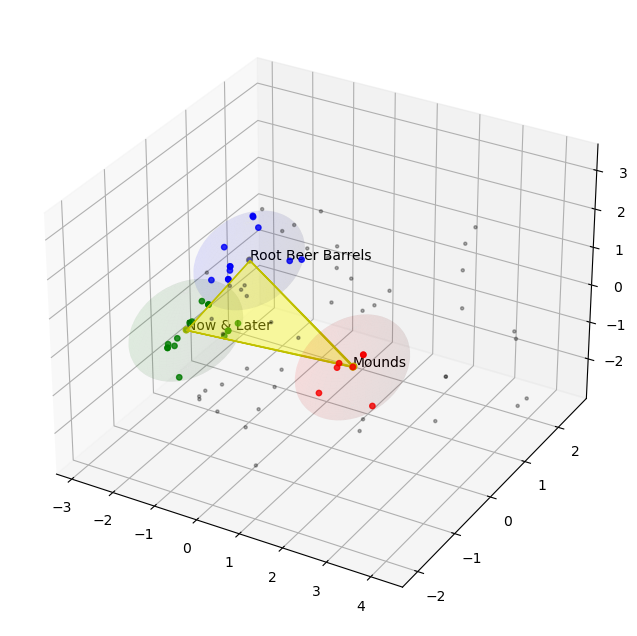

Haribo Gold Bears Reese's Peanut Butter cup Root Beer Barrels


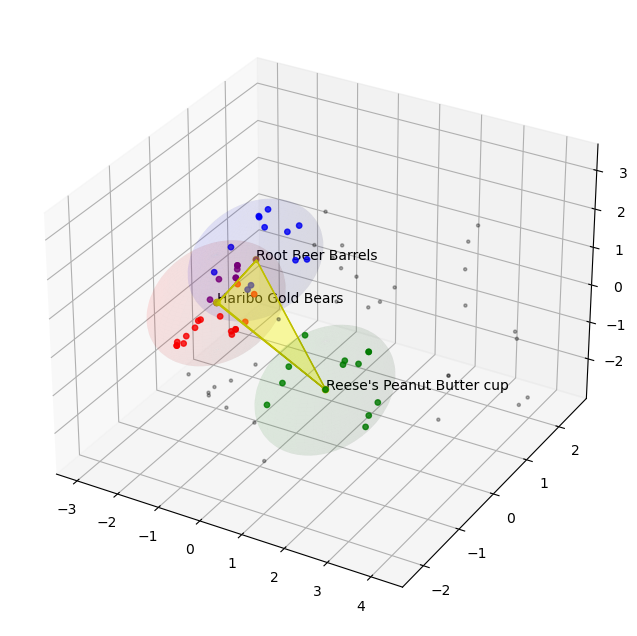

Milk Duds Pixie Sticks Root Beer Barrels


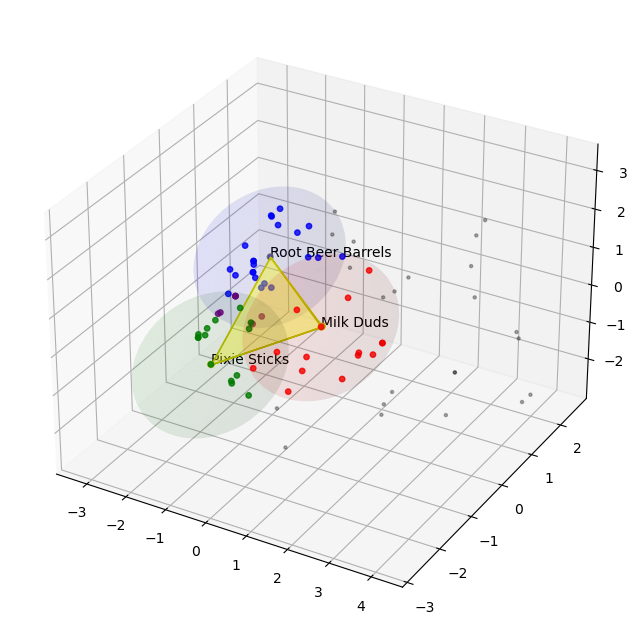

Jawbusters Snickers Tootsie Roll Juniors


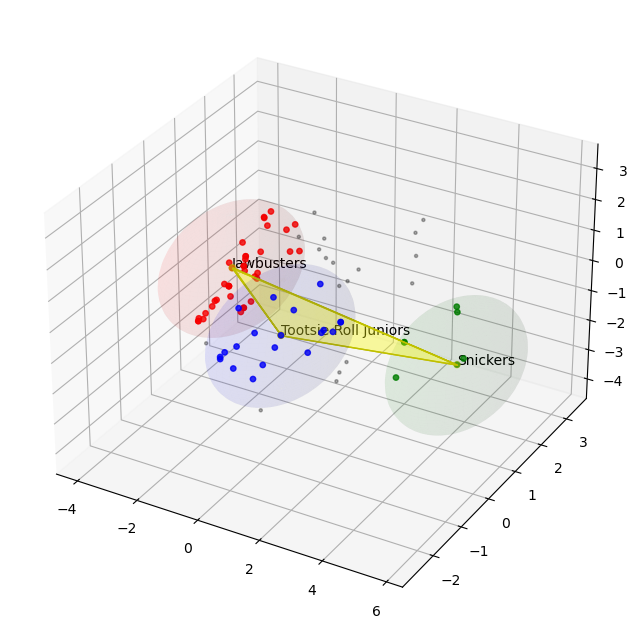

Peanut butter M&M's Skittles original Snickers Crisper


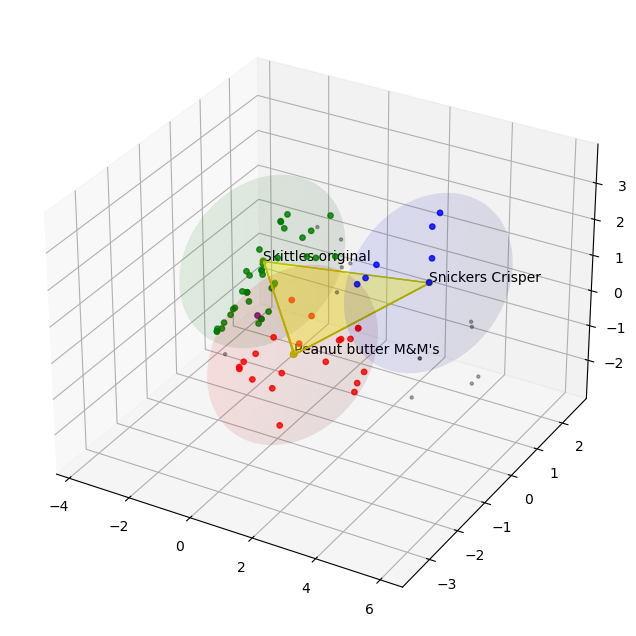

Dots Peanut butter M&M's Twix


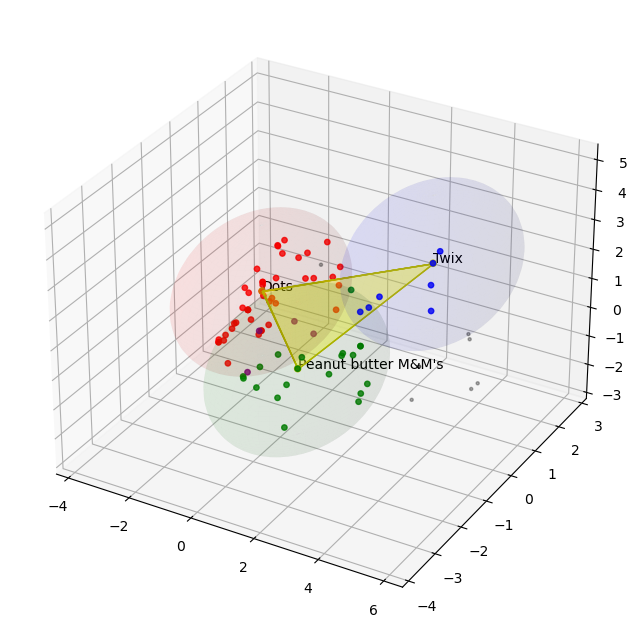

3 Musketeers Kit Kat Swedish Fish


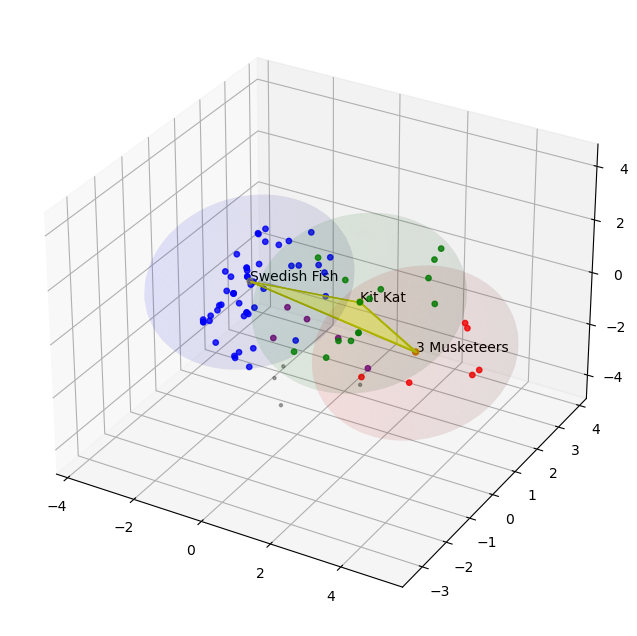

Candy Corn Kit Kat Snickers


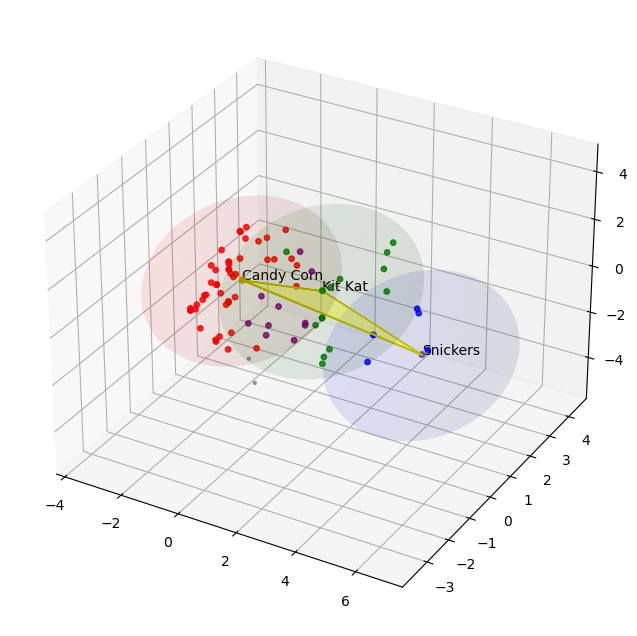

Haribo Happy Cola Kit Kat Snickers


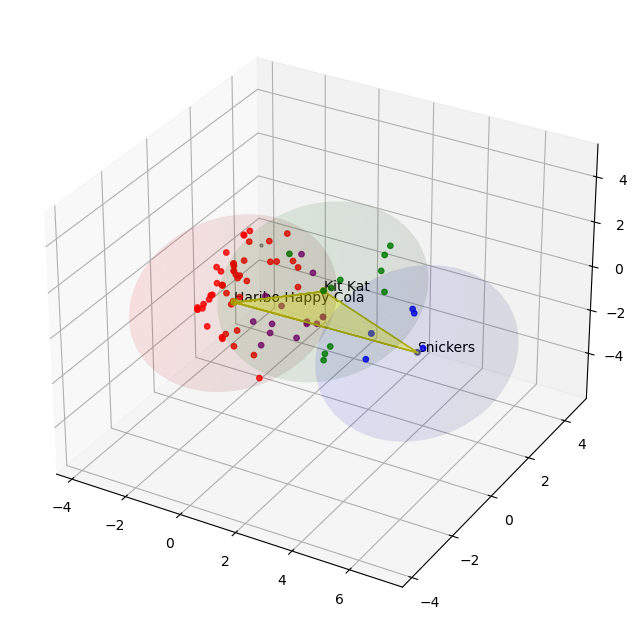

Kit Kat Lifesavers big ring gummies Snickers


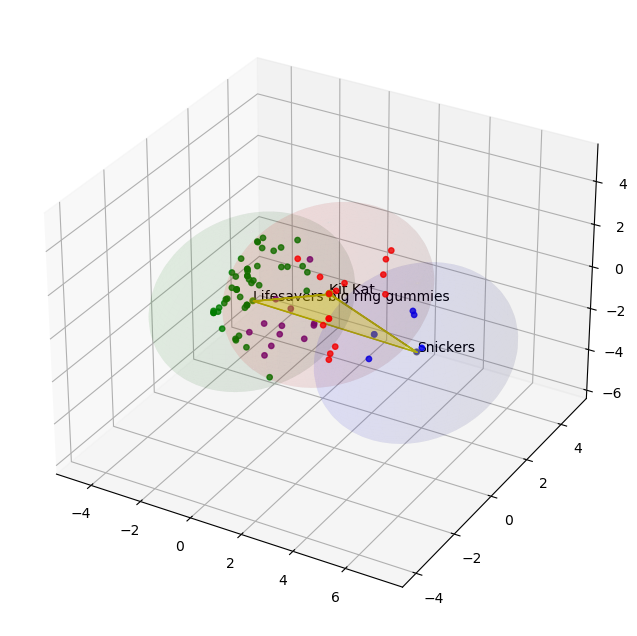

Kit Kat Snickers Starburst


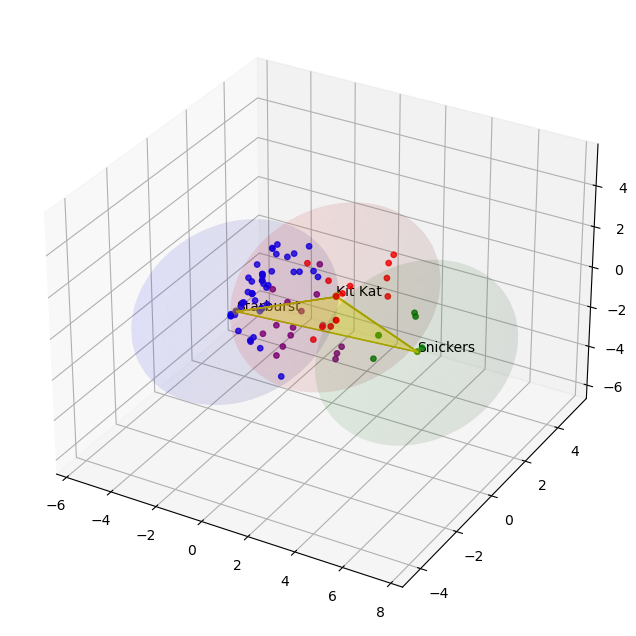

Snickers Starburst Twix


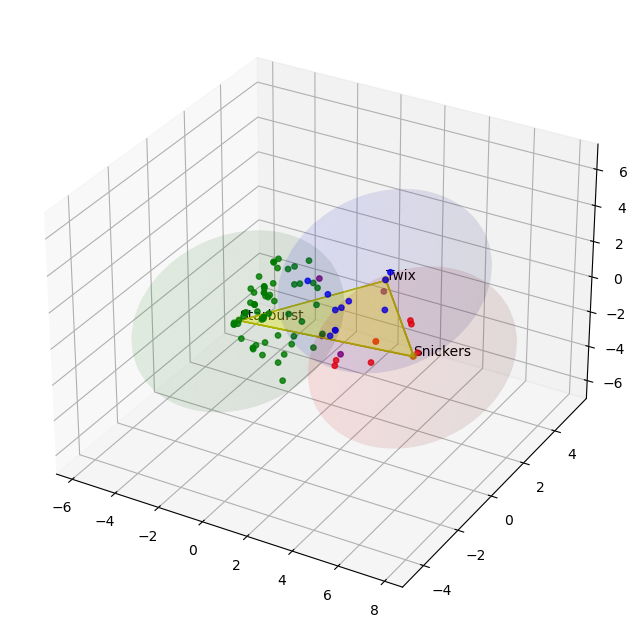

Snickers Starburst Twix


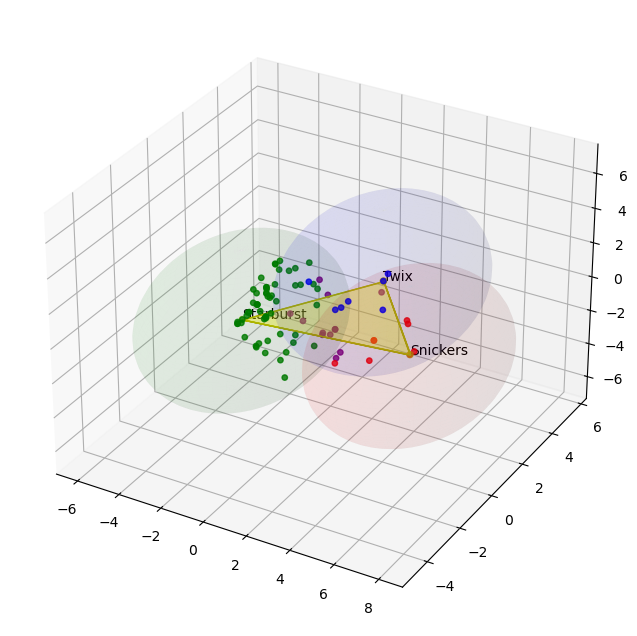

Reese's Peanut Butter cup Starburst Twix


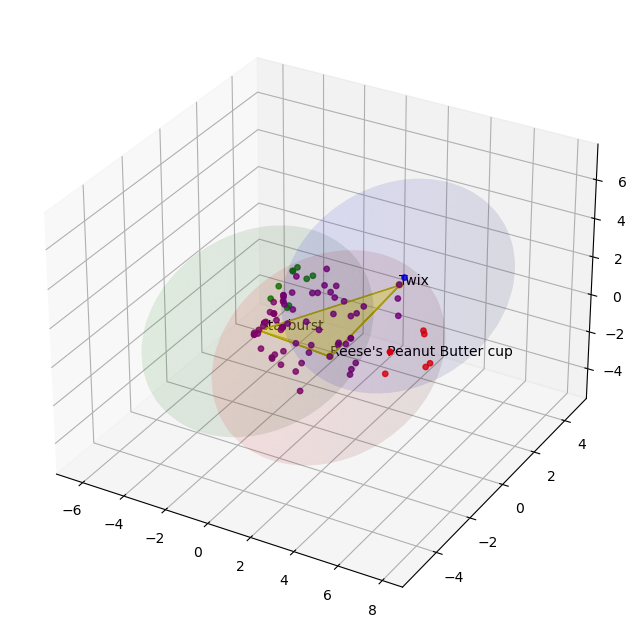

Reese's Miniatures Reese's Peanut Butter cup Starburst


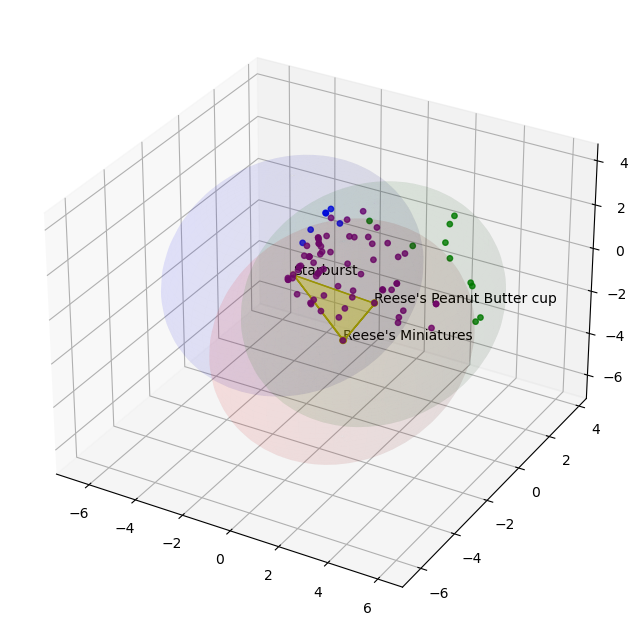

Reese's Miniatures Reese's Peanut Butter cup Twix


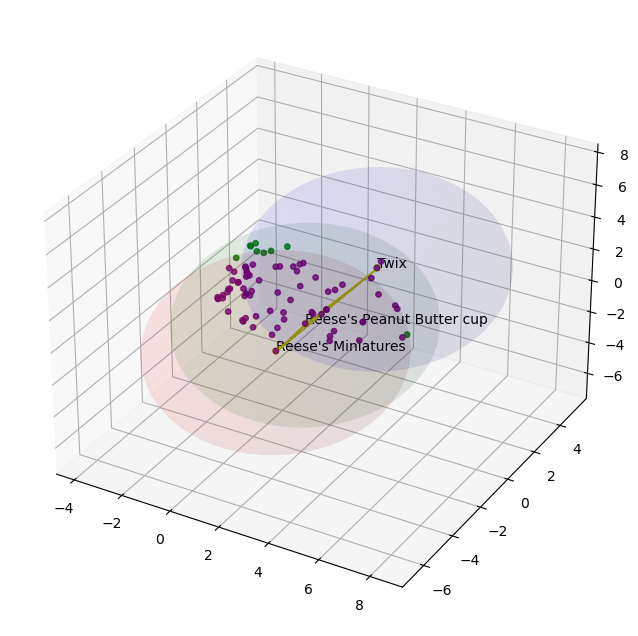

In [11]:

for radius in (1,1.25,1.5,1.75,
               2,2.25,2.5,2.75,
               3,3.25,3.5,3.75,
               4,4.25,4.5,4.75):

    df_topn=pd.read_excel('box_candy_'+str(radius)+'.xlsx', index_col=0)
    df_temp = df_data.copy()

    df_topn = df_topn.sort_values(by=['result','winpct'], ascending=False).head(1)  
    candy_1 = df_topn['candy_1'].head(1).values[0]
    candy_2 = df_topn['candy_2'].head(1).values[0]
    candy_3 = df_topn['candy_3'].head(1).values[0]
    
    print (candy_1,candy_2,candy_3)    
    
    df_candy_1 = df_data.loc[candy_1]
    df_temp[['candy_x','candy_y','candy_z']] = df_candy_1 [['x','y','z']]   
    df_temp['distance_1'] = df_temp.apply(distance, axis=1)

    df_candy_2 = df_data.loc[candy_2]
    df_temp[['candy_x','candy_y','candy_z']] = df_candy_2 [['x','y','z']]   
    df_temp['distance_2'] = df_temp.apply(distance, axis=1)

    df_candy_3 = df_data.loc[candy_3]
    df_temp[['candy_x','candy_y','candy_z']] = df_candy_3 [['x','y','z']]   
    df_temp['distance_3'] = df_temp.apply(distance, axis=1)

    df_temp = df_temp.drop(['candy_x', 'candy_x', 'candy_z'], axis=1)


    df_sphere1 = df_temp.loc[(df_temp['distance_1'] <= radius) & (df_temp['distance_2'] > radius) & (df_temp['distance_3'] > radius) ]
    df_sphere2 = df_temp.loc[(df_temp['distance_2'] <= radius) & (df_temp['distance_1'] > radius) & (df_temp['distance_3'] > radius) ]
    df_sphere3 = df_temp.loc[(df_temp['distance_3'] <= radius) & (df_temp['distance_1'] > radius) & (df_temp['distance_2'] > radius) ]

    df_combined = df_temp.loc[((df_temp['distance_1'] < radius) & (df_temp['distance_2'] < radius) & (df_temp['distance_3'] < radius))
                             |((df_temp['distance_1'] < radius) & (df_temp['distance_2'] < radius))
                             |((df_temp['distance_1'] < radius) & (df_temp['distance_3'] < radius))
                             |((df_temp['distance_2'] < radius) & (df_temp['distance_3'] < radius))]

    df_other   = df_temp.loc[(df_temp['distance_1'] > radius) & (df_temp['distance_2'] > radius) & (df_temp['distance_3'] > radius)]


    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df_other['x'], df_other['y'], zs=df_other['z'], s=5, lw=1, label="candy",c='black',alpha=0.3) 
    ax.scatter(df_combined['x'], df_combined['y'], zs=df_combined['z'], s=15, lw=1, label="candy",c='purple',alpha=0.8) 

    ax.scatter(df_sphere1['x'], df_sphere1['y'], zs=df_sphere1['z'], s=15, lw=1, label="candy",c='red',alpha=0.8) 
    ax.scatter(df_sphere2['x'], df_sphere2['y'], zs=df_sphere2['z'], s=15, lw=1, label="candy",c='green',alpha=0.8) 
    ax.scatter(df_sphere3['x'], df_sphere3['y'], zs=df_sphere3['z'], s=15, lw=1, label="candy",c='blue',alpha=0.8) 

    df_triangle1=df_data.loc[[candy_1,candy_2,candy_3]][['type','x','y','z','winpercent','chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']]

    vertices1 = np.array([
        [df_triangle1.iloc[0]['x'],df_triangle1.iloc[0]['y'],df_triangle1.iloc[0]['z']],
        [df_triangle1.iloc[1]['x'],df_triangle1.iloc[1]['y'],df_triangle1.iloc[1]['z']],
        [df_triangle1.iloc[2]['x'],df_triangle1.iloc[2]['y'],df_triangle1.iloc[2]['z']],
        [df_triangle1.iloc[0]['x']+0.01,df_triangle1.iloc[0]['y']+0.01,df_triangle1.iloc[0]['z']+0.01] 
        ])

    hull1 = ConvexHull(vertices1)

    ax.scatter(vertices1[:, 0], vertices1[:, 1], vertices1[:, 2], color='y')
    for simplex in hull1.simplices:
        tri = Poly3DCollection([vertices1[simplex]], color='yellow', edgecolor='y', alpha=0.2)
        ax.add_collection3d(tri)

    for ia, a in df_triangle1.iterrows():
        labelname = ia
        x = a['x']
        y = a['y']
        z = a['z']
        ax.text(x, y, z, '%s' % (labelname), size=10, zorder=1, color='k')

    df_position = df_data.loc[candy_1]
    candy_x, candy_y, candy_z = df_position [['x','y','z']]   
    u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
    x= candy_x + radius*np.cos(u)*np.sin(v)
    y= candy_y + radius*np.sin(u)*np.sin(v)
    z= candy_z + radius*np.cos(v)
    ax.plot_surface(x, y, z, color="red", alpha=0.05)

    df_position = df_data.loc[candy_2]
    candy_x, candy_y, candy_z = df_position [['x','y','z']]   
    u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
    x= candy_x + radius*np.cos(u)*np.sin(v)
    y= candy_y + radius*np.sin(u)*np.sin(v)
    z= candy_z + radius*np.cos(v)
    ax.plot_surface(x, y, z, color="green", alpha=0.05)

    df_position = df_data.loc[candy_3]
    candy_x, candy_y, candy_z = df_position [['x','y','z']]   
    u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
    x= candy_x + radius*np.cos(u)*np.sin(v)
    y= candy_y + radius*np.sin(u)*np.sin(v)
    z= candy_z + radius*np.cos(v)
    ax.plot_surface(x, y, z, color="blue", alpha=0.05)
       
    plt.show()
    fig.savefig('box_candy_graph_'+str(radius)+'.png', dpi=fig.dpi)
    

In [12]:

# analyze all Radius values

desc=[]

for r, temp  in result.items():
  row = temp.sort_values(by=['result','winpct'], ascending=False).head(1)  
  c1 = temp['candy_1'].head(1).values[0]
  c2 = temp['candy_2'].head(1).values[0]
  c3 = temp['candy_3'].head(1).values[0]

  x=temp.describe()['result']  

  desc.append ([c1,c2,c3,round(x[1]),round(x[2]),round(x[3]),round(x[4]),round(x[5]),round(x[6]),round(x[7])])

df_desc = pd.DataFrame(desc)
df_desc.columns = [['candy 1','candy 2','candy 3','mean','std','min','25%','50%','75%','max']]
df_desc.index = [[1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.25,4.5,4.75]]


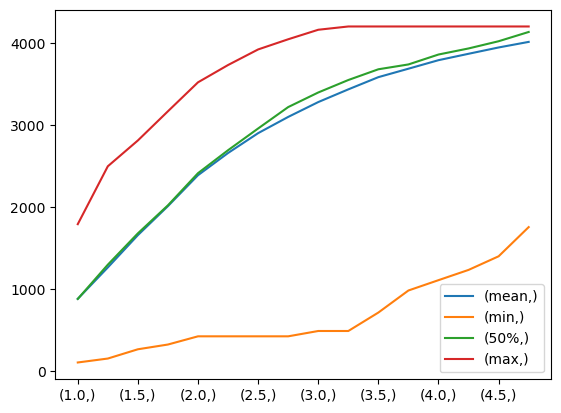

In [13]:
df_desc[['mean','min','50%','max']].plot()
plt.legend(loc='lower right')
plt.show()

In [14]:
# results

df_desc[['candy 1','candy 2','candy 3','mean','min','25%','50%','75%','max']]

,candy 1,candy 2,candy 3,mean,min,25%,50%,75%,max
1.00,Mounds,Now & Later,Root Beer Barrels,877,101,666,876,1092,1788
1.25,Haribo Gold Bears,Reese's Peanut Butter cup,Root Beer Barrels,1260,149,1005,1294,1520,2494
1.50,Milk Duds,Pixie Sticks,Root Beer Barrels,1654,262,1395,1676,1936,2809
1.75,Jawbusters,Snickers,Tootsie Roll Juniors,2008,320,1744,2018,2324,3165
2.00,Peanut butter M&M's,Skittles original,Snickers Crisper,2385,420,2060,2410,2743,3518
2.25,Dots,Peanut butter M&M's,Twix,2656,420,2306,2690,3060,3729
2.50,3 Musketeers,Kit Kat,Swedish Fish,2898,420,2558,2955,3290,3919
2.75,Candy Corn,Kit Kat,Snickers,3096,420,2812,3216,3476,4043
3.00,Haribo Happy Cola,Kit Kat,Snickers,3277,485,2993,3394,3665,4159
3.25,Kit Kat,Lifesavers big ring gummies,Snickers,3432,485,3157,3546,3735,4199


In [15]:
# this model

df_data.loc[['Kit Kat','Lifesavers big ring gummies','Snickers']][['type','winpercent','chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']]


,type,winpercent,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
competitorname,,,,,,,,,,,
Kit Kat,chocolate,76.768600,1,0,0,0,0,1,0,1,0
Lifesavers big ring gummies,fruity,52.911392,0,1,0,0,0,0,0,0,0
Snickers,chocolate,76.673782,1,0,1,1,1,0,0,1,0


In [16]:
# previos model

df_data.loc[['Snickers','Twix','Starburst']][['type','winpercent','chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']]


,type,winpercent,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
competitorname,,,,,,,,,,,
Snickers,chocolate,76.673782,1,0,1,1,1,0,0,1,0
Twix,chocolate,81.642914,1,0,1,0,0,1,0,1,0
Starburst,fruity,67.037628,0,1,0,0,0,0,0,0,1
